In [3]:

# Library imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [4]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)


print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (27, 500, 3)


Question-1

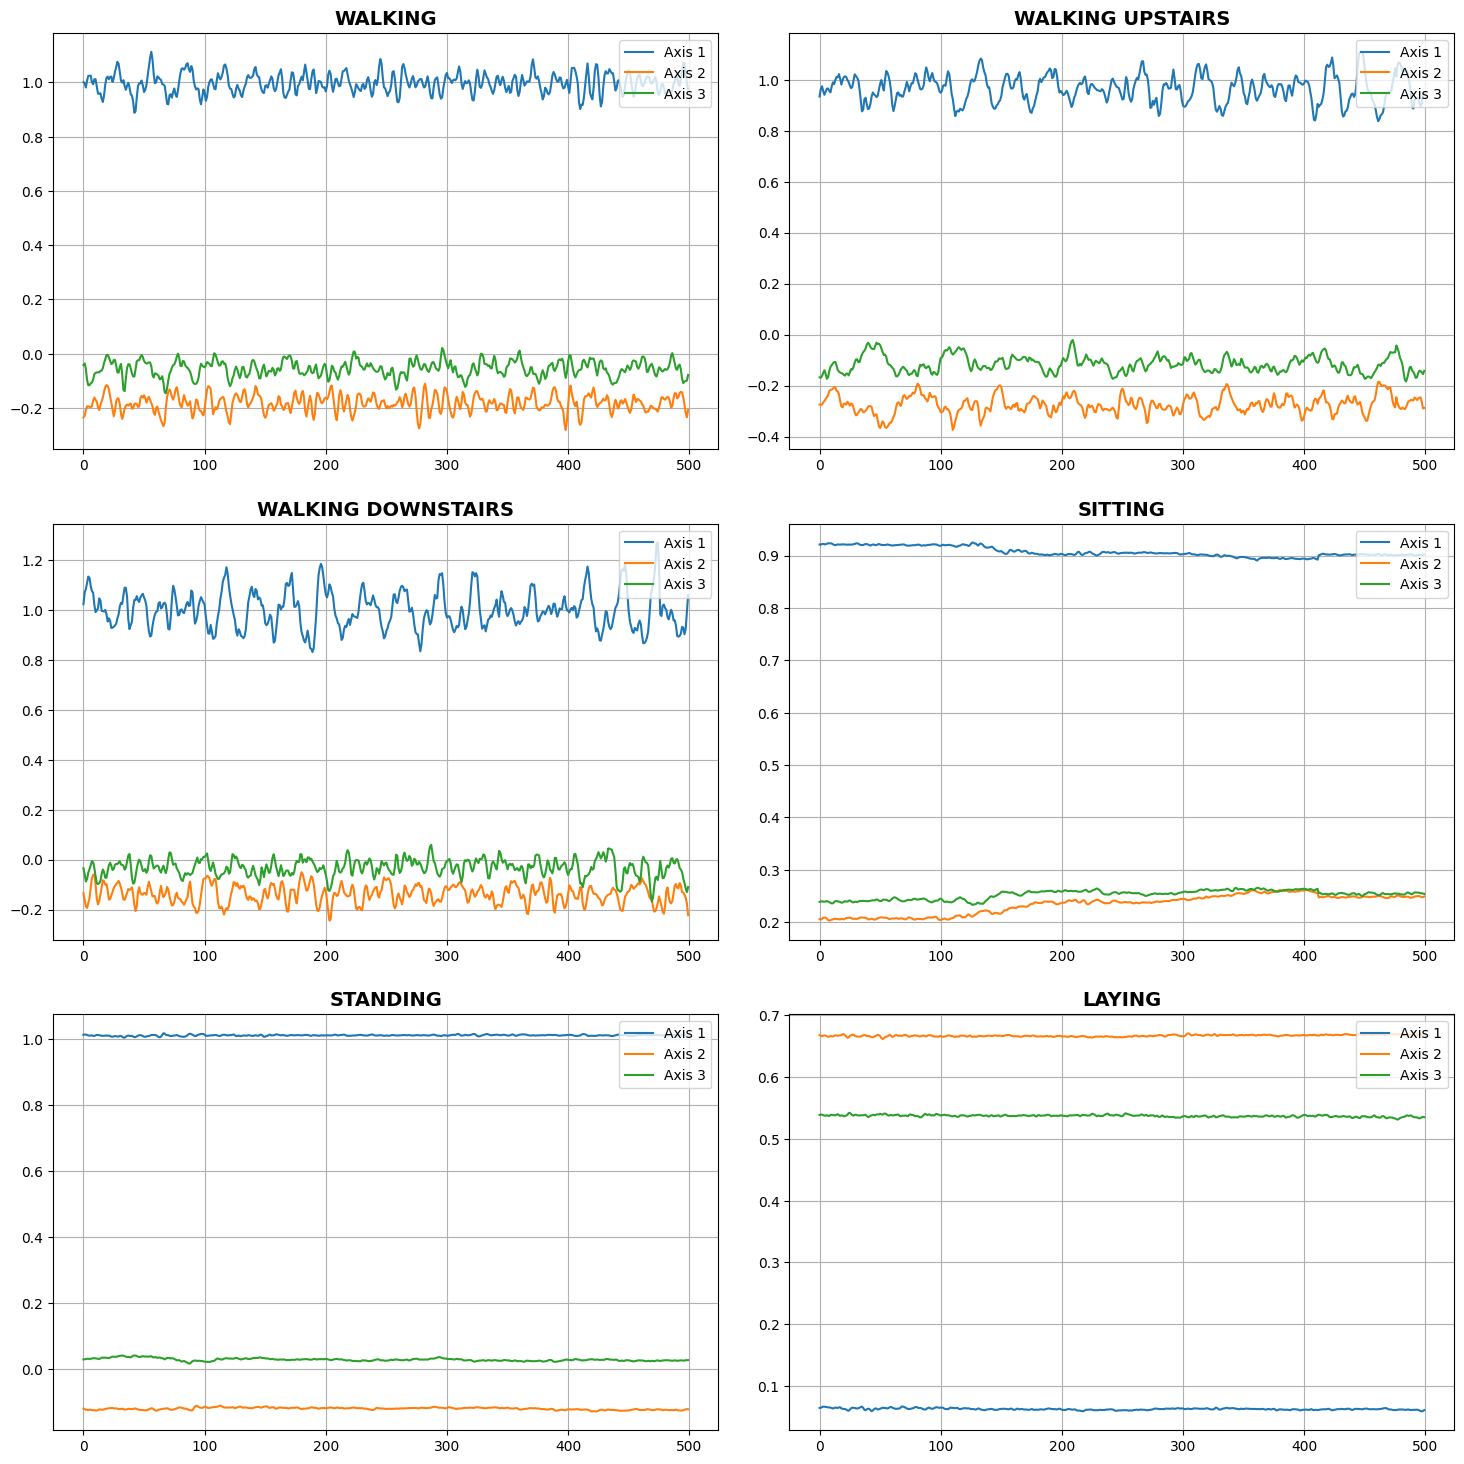

In [32]:
import matplotlib.pyplot as plt

ACTIVITIES = ['WALKING', 'WALKING UPSTAIRS', 'WALKING DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(3, 2, i + 1)  
    activity_data = X_train[y_train == (i + 1)]

    # Plot mean values for each axis (X, Y, Z)
    for j in range(3):
        plt.plot(activity_data[:, :, j].mean(axis=0), linestyle='-', label=f'Axis {j+1}')

    plt.title(ACTIVITIES[i], fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)

    plt.grid(True)

plt.tight_layout(pad=2.0)

# Display the plots
plt.show()


# OBSERVATIONS

# WALKING:
# The waveform shows consistent oscillations around a mean value of approximately 1.0.
# This indicates a regular, rhythmic pattern, which is typical for walking as the body moves up and down in a relatively predictable manner.
#The movement along the z-axis correspond to forward and backward motion, which is less intense than the vertical movement captured by Axis 1.

# WALKING_UPSTAIRS:
# The oscillations are still present but appear to have slightly more variation compared to the "WALKING" activity.
# This could be due to the additional effort required to move upwards, causing slight changes in the rhythm.

# WALKING_DOWNSTAIRS:
# The waveform shows noticeable fluctuations and a consistent pattern of peaks and valleys. 
# This indicates significant and repetitive horizontal movement, which is expected when a person is walking downstairs.
# The amplitude of fluctuations is slightly more pronounced, potentially due to the impact of descending stairs.

# SITTING:
# The waveform is relatively flat with occasional shifts in acceleration, indicating minimal movement.
# There are distinct steps in the acceleration value, possibly due to small adjustments in posture or minor movements while sitting.

# STANDING:
# Similar to sitting, the waveform is fairly flat, but with slightly more variability in the acceleration values.
# This suggests that standing involves minor adjustments in posture, but overall, there is little movement.

# LAYING:
# The waveform is mostly flat with two distinct levels of acceleration.
# There are occasional shifts, which might indicate small movements while laying down, such as adjusting position.


Question-2

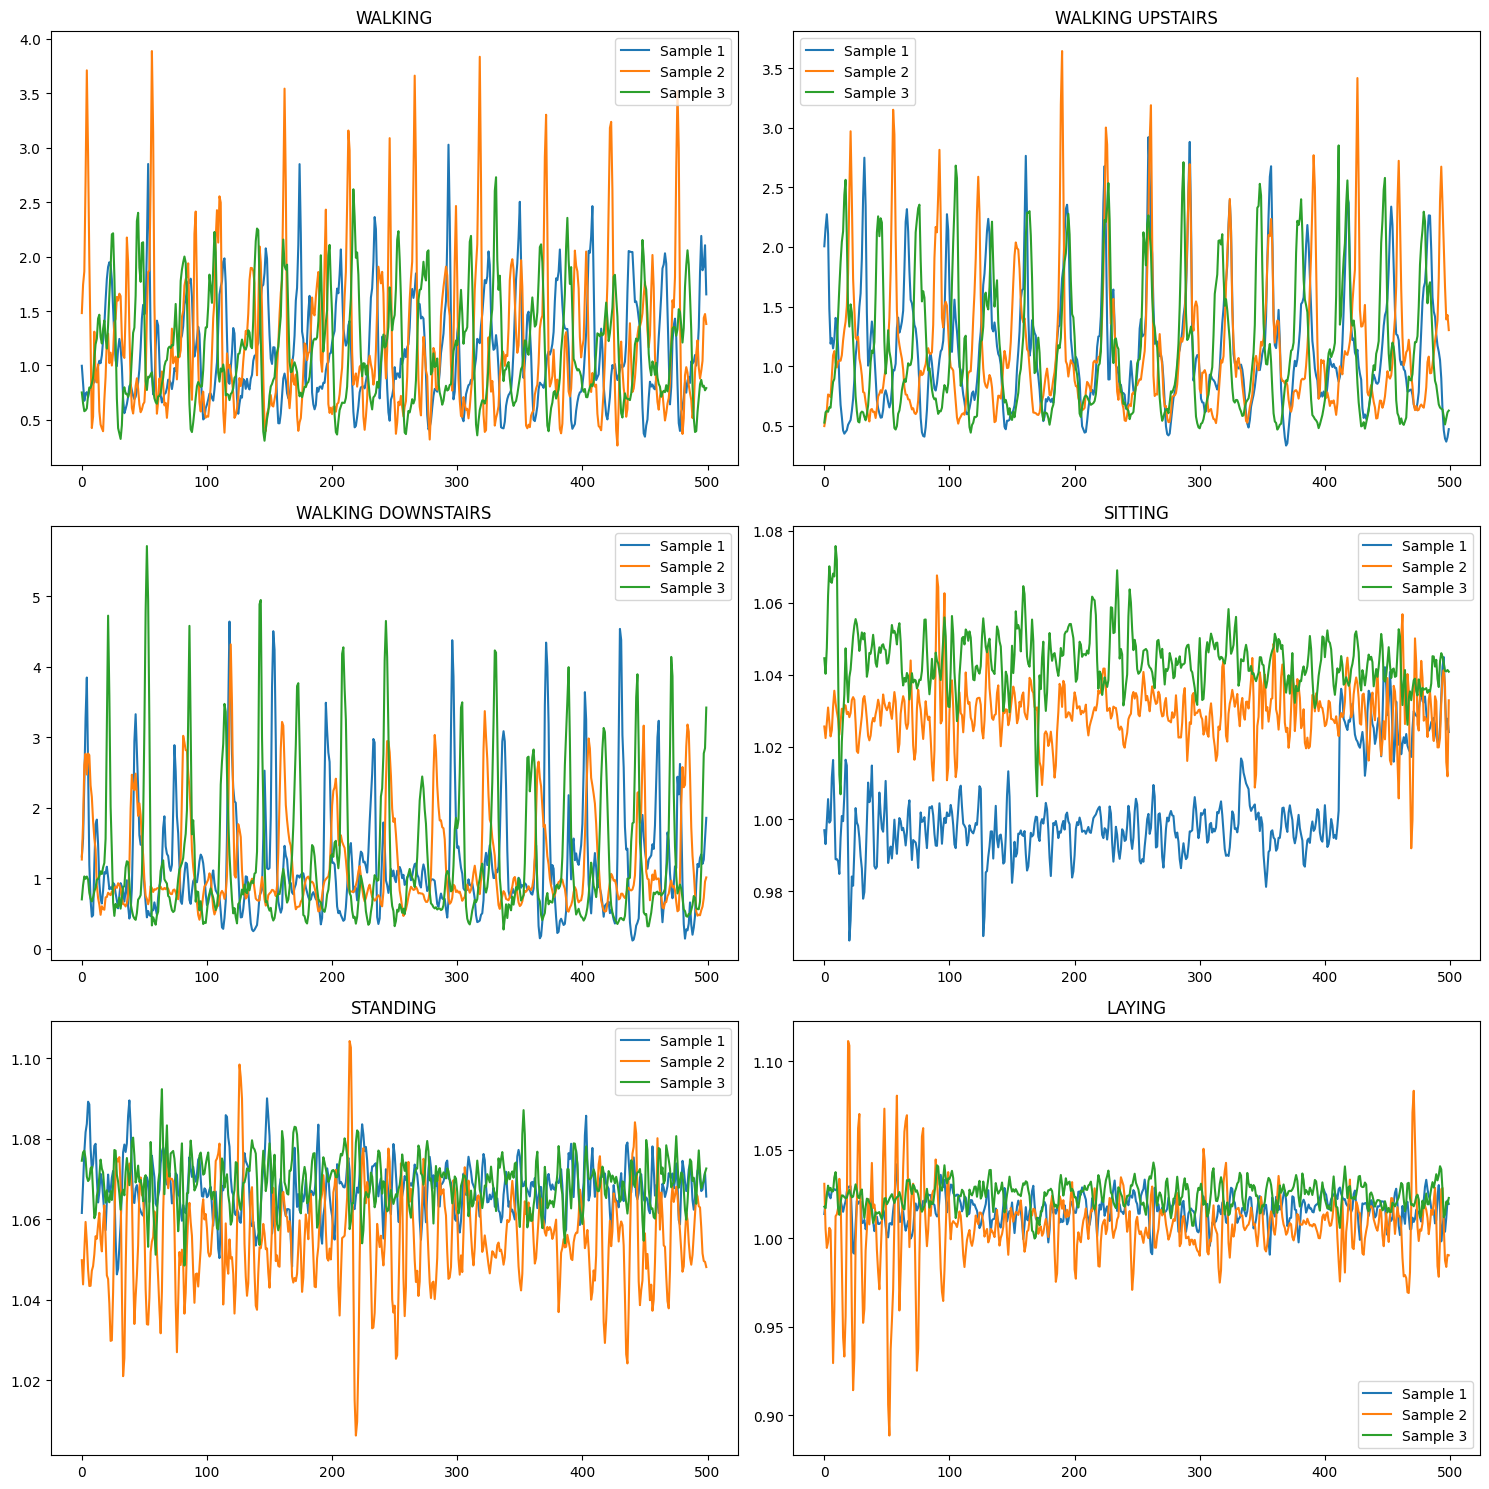

In [34]:
ACTIVITIES=['WALKING', 'WALKING UPSTAIRS', 'WALKING DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

plt.figure(figsize=(15, 15)) 

# Loop through each activity and create subplots
for i in range(6):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns, plot index i+1
    activity_data = X_train[y_train == i + 1]
    selected_samples = activity_data[:3]
    for j in range(selected_samples.shape[0]):
        total_acceleration = np.sum(selected_samples[j]**2, axis=1)
        plt.plot(total_acceleration, label=f'Sample {j+1}')

    plt.title(ACTIVITIES[i])
    plt.legend()
    
plt.tight_layout()
plt.show()


# Justification:

# Static Activities (like Sitting, Laying, and Standing): 
# These activities don’t involve much movement, so the acceleration data tends to be steady.
# From the plots, you might see that these activities have similar, consistent patterns. It might be easier to tell them apart just by looking at the data.
# Dynamic Activities (like Walking and Walking Upstairs/Downstairs): These involve a lot of movement, so the acceleration data changes a lot.
# The plots for these activities might look more varied and complex. Because of this, it can be tricky to distinguish between them just by looking at the plots. 
# Complex Patterns: Dynamic activities have more complex patterns in the data that are not always easy to see just from the plots.
# Machine learning models can learn these complex patterns and make better predictions.
# Better Accuracy: A machine learning model can handle the variations in the data 
# and be more accurate at telling the activities apart, especially for the more complex dynamic activities.
# A threshold-based approach could suffice for basic differentiation between static and dynamic activities, 
# A machine learning model would offer more comprehensive and accurate classification.


Question-3

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

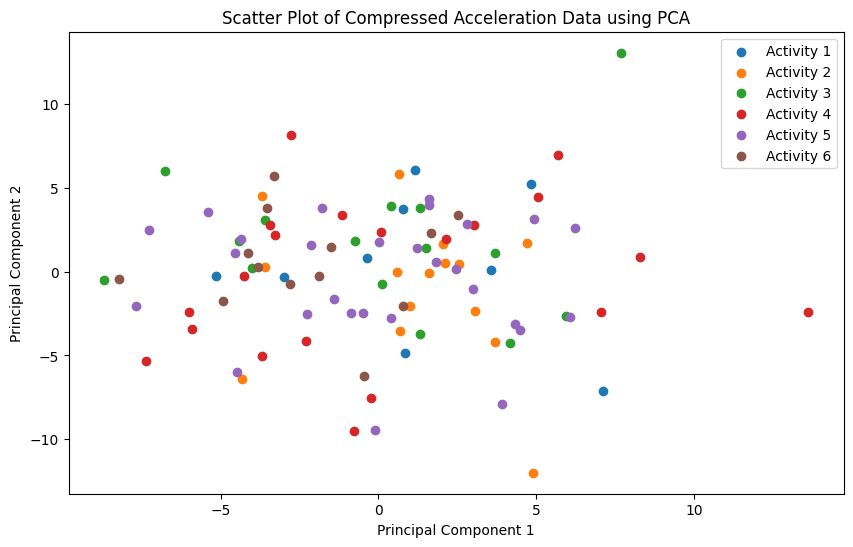

In [9]:


# Assuming your X_train is a 3D array with shape (num_samples, num_timesteps, 3)
# Assuming your y_train is a 1D array with shape (num_samples,) containing activity labels
# Each sample in X_train corresponds to an activity label in y_train

# Generate synthetic data for testing
np.random.seed(42)
num_samples = 100
num_timesteps = 50
num_activities = 6
X_train = np.random.randn(num_samples, num_timesteps, 3)
y_train = np.random.randint(0, num_activities, size=num_samples)  # Replace with actual labels

# Reshape the data to have each sample as a single vector
X_train_reshaped = X_train.reshape(num_samples, -1)

# Calculate the total acceleration
total_acceleration = np.sum(X_train**2, axis=2)

# Apply PCA to compress the data into two features
pca = PCA(n_components=2)
compressed_acc_data = pca.fit_transform(total_acceleration)

# Create a list of activity names (replace with your actual activity names)
activity_names = [f'Activity {i+1}' for i in range(num_activities)]

# Scatter plot to visualize different classes of activities with different colors
plt.figure(figsize=(10, 6))
for i in range(num_activities):
    indices = np.where(y_train == i)
    plt.scatter(compressed_acc_data[indices, 0], compressed_acc_data[indices, 1], label=activity_names[i])

plt.title('Scatter Plot of Compressed Acceleration Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
# The different activity classes (represented by different colors) do not exhibit clear and distinct clusters in the 2D PCA space.
# This suggests that the first two principal components do not fully capture the variation needed to separate the activities clearly.
# There is significant overlap between the points representing different activities.
# Since PCA is a dimensionality reduction technique, the first two principal components capture the most significant variance in the data.
# However, the overlap and spread of points suggest that more components might be needed to better distinguish between the activities.
# The significant overlap between the activities suggests that the underlying data is complex and that the differences between the activities are subtle.
# This complexity may require more sophisticated models or feature engineering to achieve good classification performance.

C:\Users\vicky\AppData\Local\Temp\ipykernel_14836\1171707470.py:41: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
C:\Users\vicky\AppData\Local\Temp\ipykernel_14836\1171707470.py:41: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
C:\Users\vicky\AppData\Local\Temp\ipykernel_14836\1171707470.py:41: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
C:\Users\vicky\AppData\Local\Temp\ipykernel_14836\1171707470.py:41: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
C:\Users\vicky\AppData\Local\Temp\ipykernel_14836\1171707470.py:41: UserWarning: Using default sampling frequency se

(18, 1152)
(54, 1152)
(18, 1152)


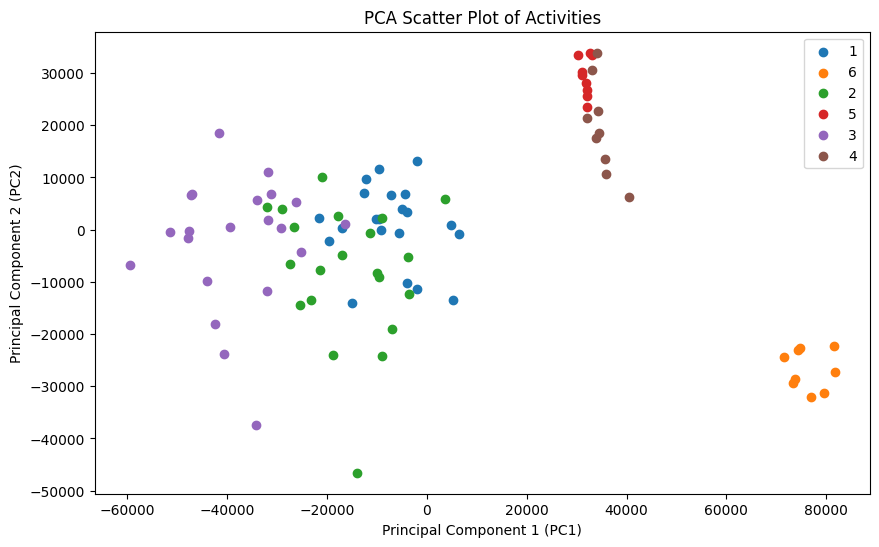

In [8]:

from sklearn.model_selection import train_test_split
import tsfel                                                                                                                                                                                                                                                                           # type: ignore

def compute_total_acceleration(accx, accy, accz):
    return np.sqrt(accx**2 + accy**2 + accz**2)

time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

X_combined = []
y_combined = []

for folder in folders:
    dataset_dir = os.path.join(combined_dir, "Train" if folder in ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"] else "Test")
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        accx = df["accx"].values[offset:offset + time * 50]
        accy = df["accy"].values[offset:offset + time * 50]
        accz = df["accz"].values[offset:offset + time * 50]
        X_combined.append(np.vstack((accx, accy, accz)).T)  # Stack and transpose to ensure correct shape
        y_combined.append(classes[folder])

X_combined = np.array(X_combined)
y_combined = np.array(y_combined)

# Splitting the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y_combined, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def extract_tsfel_features(data):
    features = []
    for sample_data in data:
        # Convert the sample data into a DataFrame with columns for 'accx', 'accy', and 'accz'
        df = pd.DataFrame({'accx': sample_data[:, 0], 'accy': sample_data[:, 1], 'accz': sample_data[:, 2]})
        # Retrieve the feature configuration for time series analysis
        cfg = tsfel.get_features_by_domain()
        # Extract time series features using the TSFEL library with the provided configuration
        extracted_features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        features.append(extracted_features.values.flatten())
    return np.array(features)


X_train_features = extract_tsfel_features(X_train)
X_test_features = extract_tsfel_features(X_test)
X_val_features = extract_tsfel_features(X_val)

print(X_val_features.shape)
print(X_train_features.shape)
print(X_test_features.shape)

# Combining all features for PCA
X_all_features = np.concatenate((X_train_features, X_test_features, X_val_features))
y_all = np.concatenate((y_train, y_test, y_val))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_features)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity'] = y_all

plt.figure(figsize=(10, 6))
for activity in df_pca['Activity'].unique():
    plt.scatter(df_pca.loc[df_pca['Activity'] == activity, 'PC1'],
                df_pca.loc[df_pca['Activity'] == activity, 'PC2'],
                label=activity)

plt.title('PCA Scatter Plot of Activities')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


In [36]:
# Applying PCA directly to the raw accelerometer data (whether flattened or not) results in principal components that are linear 
# combinations of the original features—specifically, the acceleration values along the X, Y, and Z axes.
# These principal components correspond to directions in the original feature space that capture the highest variance.
# However, when PCA is applied to features extracted using TSFEL, the principal components originate from a more complex, higher-dimensional space of time series features.
# These extracted features are designed to encapsulate various characteristics and patterns inherent in the time series data.

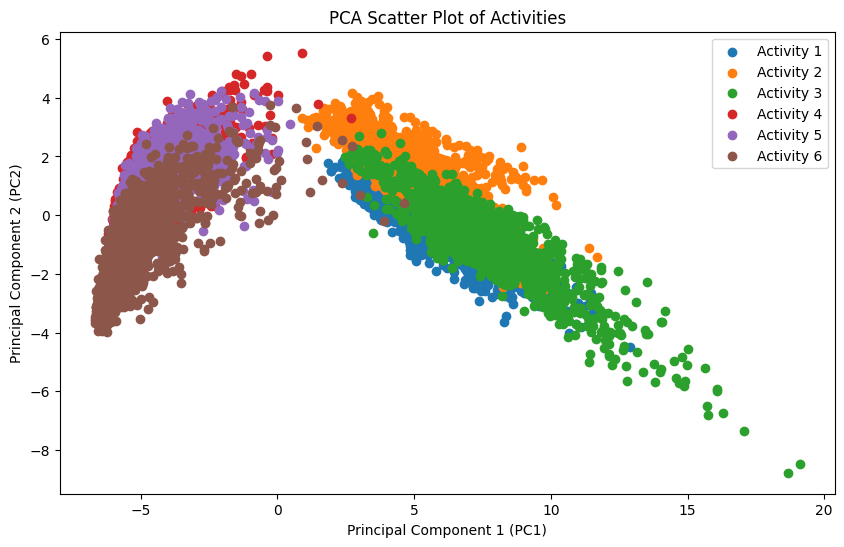

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'combined_dir' is the directory where the UCI HAR dataset is stored
combined_dir = os.path.join("Combined")

# Load the training and test data
X_train = pd.read_csv(os.path.join(combined_dir, "X_train.txt"), sep=r"\s+", header=None).values
y_train = pd.read_csv(os.path.join(combined_dir, "y_train.txt"), sep=r"\s+", header=None).values.ravel()  # ravel to flatten the array
X_test = pd.read_csv(os.path.join(combined_dir, "X_test.txt"), sep=r"\s+", header=None).values
y_test = pd.read_csv(os.path.join(combined_dir, "y_test.txt"), sep=r"\s+", header=None).values.ravel()

# Combine train and test data for PCA
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))

# Perform PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity'] = y_all

# Plot the PCA results
plt.figure(figsize=(10, 6))
for activity in np.unique(df_pca['Activity']):
    plt.scatter(df_pca.loc[df_pca['Activity'] == activity, 'PC1'],
                df_pca.loc[df_pca['Activity'] == activity, 'PC2'],
                label=f'Activity {activity}')

plt.title('PCA Scatter Plot of Activities')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()
